In [1]:
import pandas as pd 
import cv2, numpy as np
import idx2numpy as idx
from matplotlib import pyplot as plt
%matplotlib inline

# keras
np.random.seed(13)
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Reshape, Activation, SimpleRNN, GRU, LSTM, Convolution1D, \
                         MaxPooling1D, Merge, Dropout, Input
from IPython.display import SVG
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.preprocessing.text import Tokenizer
#from keras.utils.visualize_util import model_to_dot, plot
from keras.utils.vis_utils import model_to_dot, plot_model
from keras.datasets import imdb, reuters
from keras.preprocessing import sequence
from keras.optimizers import SGD, RMSprop
from keras import backend as K
from keras.layers import Input, Flatten, Dense, Dropout, Activation # keras.layers.core 
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.datasets import mnist
from keras.applications.vgg16 import VGG16

# logging
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Using Theano backend.


### import and clean data

In [32]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [34]:
X_train[0].shape

(28, 28)

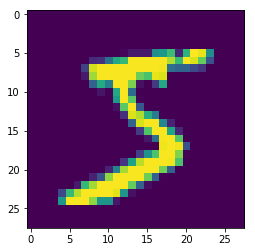

In [24]:
plt.imshow(X_train[0])

In [25]:
# Preprocess input data 
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255

In [26]:
# Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [28]:
X_train.shape

(60000, 1, 28, 28)

### build cnn model based on vgg16

In [31]:
# get pretrained topless VGG16
base_model = VGG16(include_top=False, weights='imagenet', input_shape=X_train.shape[1:])
# base_model.summary()

ValueError: The input must have 3 channels; got `input_shape=(1, 28, 28)`

In [30]:
# freeze VGG16 layers
for layer in base_model.layers:
    layer.trainable = False

NameError: name 'base_model' is not defined

In [ ]:
# add final layers
x = base_model.output
# x = Flatten(input_shape=base_model.output_shape[1:], name='flatten')(x)
x = Dropout(0.5)(x)
# x = Dense(4096, activation='relu', name='fc1')(x) # TODO tune num of neurons and/or delete/add this layer
# x = Dense(4096, activation='relu', name='fc2')(x) # TODO tune num of neurons and/or delete/add this layer      
n_classes = 10
predictions = Dense(n_classes, activation='softmax', name='predictions')(x)

In [ ]:
# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions) # inputs=base_model.input

In [ ]:
# compile model
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True) # TODO slowly lower lr to 0.01 or something else
model.compile(optimizer=sgd, loss='categorical_crossentropy')

In [ ]:
# Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### model training

In [ ]:
# train model
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1) # TODO tune this